In [1]:
from bs4 import BeautifulSoup
import requests
import pandas as pd

In [2]:
URL = 'https://www.amazon.in/s?k=bags&crid=2M096C61O4MLT&qid=1653308124&sprefix=ba%2Caps%2C283&ref=sr_pg_1'

In [4]:
#Headers for request
HEADERS = ({'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/109.0.0.0 Safari/537.36', 'Accept-Language' : 'en-US,en;q=0.5'})

In [5]:
#HTTP Request
webpage = requests.get(URL, headers = HEADERS)

In [6]:
webpage

<Response [200]>

In [8]:
#Soup containing all data
soup = BeautifulSoup(webpage.content, "html.parser")

In [10]:
links = soup.find_all("a", attrs = {"class" : "a-link-normal s-underline-text s-underline-link-text s-link-style a-text-normal"})

In [13]:
link = links[0].get('href').strip()

In [14]:
product_link = "https://amazon.in" + link

In [15]:
product_link

'https://amazon.in/sspa/click?ie=UTF8&spc=MTo3OTE1Njc3MjEzNjg2NDI2OjE2NzUzNDcwMTA6c3BfYXRmOjIwMTA0MTQwMjYzNjk4OjowOjo&url=%2FUrban-Tribe-Laptop-Backpack-Havana%2Fdp%2FB01LXNNFDF%2Fref%3Dsr_1_1_sspa%3Fcrid%3D2M096C61O4MLT%26keywords%3Dbags%26qid%3D1675347010%26sprefix%3Dba%252Caps%252C283%26sr%3D8-1-spons%26sp_csd%3Dd2lkZ2V0TmFtZT1zcF9hdGY%26psc%3D1%26smid%3DA385M0TPSNV7VS'

In [16]:
new_webpage = requests.get(product_link, headers = HEADERS)

In [17]:
new_webpage

<Response [200]>

In [18]:
new_soup = BeautifulSoup(new_webpage.content, "html.parser")

<!DOCTYPE html>
<html class="a-no-js" data-19ax5a9jf="dingo" lang="en-in"><!-- sp:feature:head-start -->
<head><script>var aPageStart = (new Date()).getTime();</script><meta charset="utf-8"/>
<!-- sp:end-feature:head-start -->
<!-- sp:feature:csm:head-open-part1 -->
<script type="text/javascript">var ue_t0=ue_t0||+new Date();</script>
<!-- sp:end-feature:csm:head-open-part1 -->
<!-- sp:feature:cs-optimization -->
<meta content="on" http-equiv="x-dns-prefetch-control"/>
<link href="https://images-eu.ssl-images-amazon.com" rel="dns-prefetch"/>
<link href="https://m.media-amazon.com" rel="dns-prefetch"/>
<link href="https://completion.amazon.com" rel="dns-prefetch"/>
<!-- sp:end-feature:cs-optimization -->
<!-- sp:feature:csm:head-open-part2 -->
<script type="text/javascript">
window.ue_ihb = (window.ue_ihb || window.ueinit || 0) + 1;
if (window.ue_ihb === 1) {

var ue_csm = window,
    ue_hob = +new Date();
(function(d){var e=d.ue=d.ue||{},f=Date.now||function(){return+new Date};e.d=func
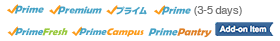
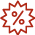

In [19]:
new_soup

In [26]:
title = new_soup.find("span", attrs = {"id" : "productTitle"})

In [29]:
title.text.strip()

'URBAN TRIBE Havana 15.6" inch Laptop Backpack for Men and Women | 27L Office/Work/Casual Bag | Water Repellent | Black'

In [80]:
asin = new_soup.find("ul", attrs = {"class": "a-unordered-list a-nostyle a-vertical a-spacing-none detail-bullet-list"}).find_all("span")[12].text.split()[4
]

In [81]:
asin

'B01LXNNFDF'

In [82]:
new_link = "https://www.amazon.in/Amazon-Basics-Modern-Lightweight-Backpack/dp/B09W4ZPP3D/ref=sr_1_2_sspa?crid=2M096C61O4MLT&keywords=bags&qid=1675347159&sprefix=ba%2Caps%2C283&sr=8-2-spons&sp_csd=d2lkZ2V0TmFtZT1zcF9hdGY&th=1"

In [83]:
second_webpage = requests.get(new_link, headers = HEADERS)

In [84]:
second_webpage

<Response [200]>

In [85]:
second_soup = BeautifulSoup(second_webpage.content, "html.parser")

<!DOCTYPE html>
<html class="a-no-js" data-19ax5a9jf="dingo" lang="en-in"><!-- sp:feature:head-start -->
<head><script>var aPageStart = (new Date()).getTime();</script><meta charset="utf-8"/>
<!-- sp:end-feature:head-start -->
<!-- sp:feature:csm:head-open-part1 -->
<script type="text/javascript">var ue_t0=ue_t0||+new Date();</script>
<!-- sp:end-feature:csm:head-open-part1 -->
<!-- sp:feature:cs-optimization -->
<meta content="on" http-equiv="x-dns-prefetch-control"/>
<link href="https://images-eu.ssl-images-amazon.com" rel="dns-prefetch"/>
<link href="https://m.media-amazon.com" rel="dns-prefetch"/>
<link href="https://completion.amazon.com" rel="dns-prefetch"/>
<!-- sp:end-feature:cs-optimization -->
<!-- sp:feature:csm:head-open-part2 -->
<script type="text/javascript">
window.ue_ihb = (window.ue_ihb || window.ueinit || 0) + 1;
if (window.ue_ihb === 1) {

var ue_csm = window,
    ue_hob = +new Date();
(function(d){var e=d.ue=d.ue||{},f=Date.now||function(){return+new Date};e.d=func
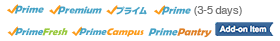
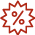

In [86]:
second_soup

In [175]:
asin_1 = soup.find('div',{'data-index':'4'})['data-asin']

In [176]:
asin_1

'B07CJCGM1M'

In [183]:
prod_asin = []
try:
    for i in range(200):
        prod_asin.append(soup.find('div',{'data-index':i})['data-asin'])
except:
    prod_asin.append('')
prod_asin     
    

['',
 '',
 'B01LXNNFDF',
 'B09W4ZPP3D',
 'B07CJCGM1M',
 'B084JGJ8PF',
 'B09TPX22NF',
 '',
 '',
 'B08Z1HHHTD',
 'B07QN4KXWG',
 'B09B29F66W',
 'B07M9BRCQ5',
 'B088XB5XY8',
 'B0BP1QM6W5',
 'B078JVT384',
 'B09B26MB5M',
 '',
 '',
 '',
 'B07F3X45WZ',
 'B09VCLZ3K4',
 'B07G3CG9FC',
 'B07K8KLB3P',
 'B084ZHP97M',
 'B08X2T2M8G',
 'B085MHDJ93',
 'B0BGSV19KZ',
 'B07L1PKDNQ',
 '',
 '',
 '',
 '',
 '',
 '',
 '']

In [184]:
price = second_soup.find("span", attrs = {"class" : "a-offscreen"})

In [186]:
price.text

'₹1,209.00'

In [190]:
rating = second_soup.find("span", attrs={'class':'a-icon-alt'}).string.strip()

In [191]:
rating

'1.0 out of 5 stars'

In [195]:
review_count = new_soup.find("span", attrs={'id':'acrCustomerReviewText'}).string.strip()

In [196]:
review_count

'684 ratings'

In [213]:
desc =  second_soup.find("ul" , attrs = {"class" : "a-unordered-list a-vertical a-spacing-mini"})

In [216]:
desc.text.strip()

'Laptop backpack made from water-resistant, strong and durable polyester    Slim, contoured, lightweight design with quick-access compartments that ensures protection and comfort    Contains two large compartments, two easy-access front pockets, two side pockets, and two water-bottle pockets    Well-cushioned polyester pocket that stores up to 15.6-inch laptop    Cushioned shoulder strap for added comfort and well-padded back to provide support    Dimensions: 43 x 30 x 16 cm (L x W x H)    Weight: 0.76 gms'

In [252]:
manu = second_soup.find_all("td", attrs = {"class" : "a-size-base prodDetAttrValue"})[1].string.strip()

In [253]:
manu

'\u200eFlab internatioanl private limited, FLAB INTERNATIONAL PRIVATE LIMITED PLOT NO. 357 E, PACE CITY-2, SEC-37, GURGAON - 122001 (HARYANA) INDIA 91- 9873326777'

In [254]:
wes_link = "https://www.amazon.in/Wesley-Milestone-Waterproof-Backpack-Business/dp/B084JGJ8PF/ref=sr_1_4?crid=2M096C61O4MLT&keywords=bags&qid=1675347159&sprefix=ba%2Caps%2C283&sr=8-4&th=1"